[*********************100%%**********************]  1 of 1 completed
/tmp/ipykernel_570/3864695737.py:43: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  simulation_df[x] = price_series


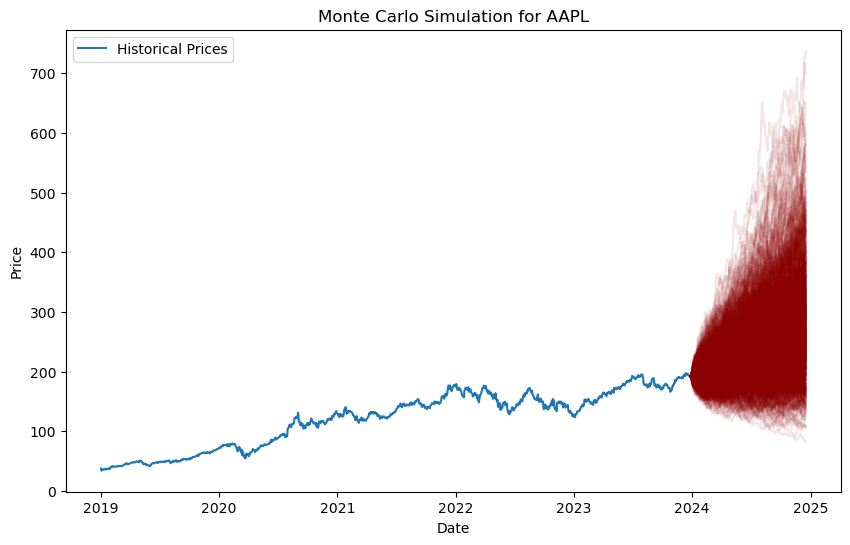

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock ticker
ticker = 'AAPL'

# Import Apple stock data for the specified time period
data = yf.download(ticker, start='2019-01-01', end='2024-01-01')

# Drop any rows with missing values
data = data.dropna()

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Calculate mean and standard deviation of returns
mean_return = data['Returns'].mean()
std_return = data['Returns'].std()

# Extract last price and date
last_price = data['Adj Close'].iloc[-1]
last_date = data.index[-1]

# Define number of simulations and days
num_simulations = 1000
num_days = 252  # Number of business days in a year

# Generate future simulation dates
simulation_dates = pd.date_range(last_date, periods=num_days+1, freq='B')  # Business days

# Initialize a DataFrame to store the simulation results for future dates
simulation_df = pd.DataFrame(index=simulation_dates)

# Perform Monte Carlo simulations
for x in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        # Apply geometric Brownian motion formula with randomness
        next_price = price_series[-1] * np.exp((mean_return - (std_return ** 2) / 2) + std_return * np.random.normal())
        price_series.append(next_price)
    simulation_df[x] = price_series

# Plot historical data and Monte Carlo simulations
plt.figure(figsize=(10, 6))
plt.plot(data['Adj Close'], label='Historical Prices')
for x in simulation_df.columns:
    plt.plot(simulation_df.index, simulation_df[x], color='darkred', alpha=0.1)  # Use alpha for transparency
plt.title(f'Monte Carlo Simulation for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Historical Prices'])
plt.show()
